In [18]:
palette = ["#ca0020", "#bababa", "#e18383", "#b8acad" ]


# Compute BLEU score

In [1]:
from nltk.translate.bleu_score import sentence_bleu
reference = [
    'this is a dog'.split(),
    'it is dog'.split(),
    'dog it is'.split(),
    'a dog, it is'.split() 
]
candidate = 'it is dog'.split()
print('BLEU score -> {}'.format(sentence_bleu(reference, candidate )))


BLEU score -> 1.2213386697554703e-77


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [2]:
import pandas as pd
path = 'explanations/'

df_poly_path = path + 'polyjuice_exp_diverse.xlsx' 
df_mice_path = path + 'mice_exp_diverse.xlsx' 
groundtruth_col = 'Text'
exp_col = 'Counterfactual'
label_col = 'Original_pred'

df_poly = pd.read_excel(df_poly_path)
print(df_poly.shape)

n = df_poly.shape[0]
df_mice = pd.read_excel(df_mice_path).sample(n)
print(df_mice.shape)

(300, 4)
(300, 4)


Exception


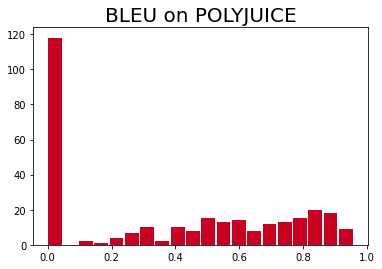

In [35]:
import matplotlib.pyplot as plt

blue_poly = []
for i, row in df_poly.iterrows():
  try:
    ref = [row[groundtruth_col].split()]
    s = row[exp_col].split()
    blue_poly.append(sentence_bleu(ref, s))
  except:
    print("Exception")
plt.hist(blue_poly, bins=20, color=palette[0], zorder=2, rwidth=0.9) #, color=palette[0]) 86bf91
plt.title('BLEU on POLYJUICE', fontsize=20)

plt.savefig('vis_res/blue_poly.eps', format='eps', dpi=1200,bbox_inches='tight')


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

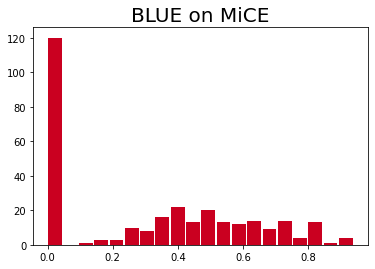

In [34]:
blue_mice = []
for i, row in df_mice.iterrows():
  try:
    ref = [row[groundtruth_col].split()]
    s = row[exp_col].split()
    blue_mice.append(sentence_bleu(ref, s))
  except:
    print("Exception")
plt.hist(blue_mice, bins=20, color=palette[0], zorder=2, rwidth=0.9) #, color=palette[0]) 86bf91
plt.title('BLUE on MiCE', fontsize=20)

plt.savefig('vis_res/blue_mice.eps', format='eps', dpi=1200,bbox_inches='tight')


In [5]:
import numpy as np
print("Poly BLUE", np.array(blue_poly).mean())
print("MiCE BLUE", np.array(blue_mice).mean())

Poly BLUE 0.3811889034700161
MiCE BLUE 0.3118287025458064


# Compute Self-BERT scores

In [7]:
from bert_score import score

In [8]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False


In [9]:
cands = []
refs = []
for i, row in df_mice.iterrows():
  if (~ isfloat(row[exp_col])) and (~ isfloat(row[groundtruth_col])):
    cands.append(row[exp_col])
    refs.append(row[groundtruth_col])


In [10]:
P_mice, R_mice, F1_mice = score(cands, refs, lang="en", verbose=True)

Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


  0%|          | 0/6 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/5 [00:00<?, ?it/s]

done in 173.57 seconds, 1.73 sentences/sec


In [11]:
for i in range(len(refs)):
  try:
    cands[i].split()
  except:
    print(i)

In [12]:
cands = []
refs = []
for i, row in df_poly.iterrows():
  if (~ isfloat(row[exp_col])) and (~ isfloat(row[groundtruth_col])):
    cands.append(row[exp_col])
    refs.append(row[groundtruth_col])
cands = cands[:60] + cands[61:]
refs = refs[:60] + refs[61:]
P_poly, R_poly, F1_poly = score(cands[:100], refs[:100], lang="en", verbose=True)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


  0%|          | 0/3 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 67.90 seconds, 1.47 sentences/sec


In [13]:
len(refs)

299

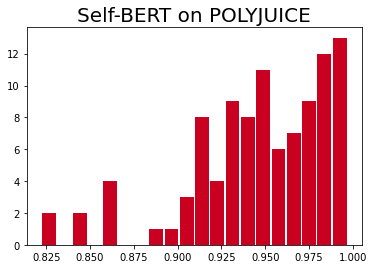

In [33]:
plt.hist(F1_poly, bins=20, color=palette[0], zorder=2, rwidth=0.9)
plt.title('Self-BERT on POLYJUICE', fontsize=20)

plt.savefig('vis_res/selfbert_poly.eps', format='eps', dpi=1200,bbox_inches='tight')


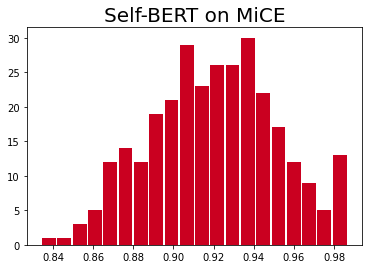

In [32]:
plt.hist(F1_mice, bins=20, color=palette[0], zorder=2, rwidth=0.9) #, color=palette[0]) 86bf91
plt.title('Self-BERT on MiCE', fontsize=20)
plt.savefig('vis_res/selfbert_mice.eps', format='eps', dpi=1200,bbox_inches='tight')


In [16]:
print("Poly self-bert", np.array(F1_poly).mean())
print("MiCE self-bert", np.array(F1_mice).mean())

Poly self-bert 0.94625753
MiCE self-bert 0.9204549
